In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

train=pd.read_csv('/content/drive/MyDrive/DScover/24-2 가이드/train_df.csv')
test=pd.read_csv('/content/drive/MyDrive/DScover/24-2 가이드/test_df.csv')

train_df=train.drop(columns='Unnamed: 0',axis=1)
test_df=test.drop(columns=['Unnamed: 0','cluster'],axis=1)

In [ ]:
train_df['education'].unique()

array(['Bachelors', 'HS-grad', 'Some-college', '11th', 'Masters', '9th',
       '12th', 'Assoc-acdm', '10th', 'Doctorate', 'Assoc-voc', '7th-8th',
       '5th-6th', '1st-4th', 'Prof-school', 'Preschool'], dtype=object)

##교육수준 관련

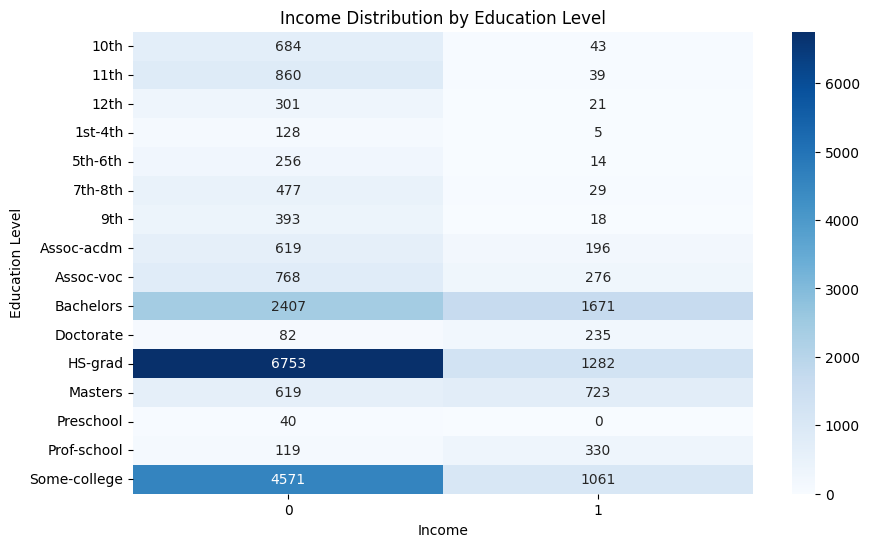

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

education_income_pivot = train_df.pivot_table(index='education', columns='income', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(education_income_pivot, annot=True, fmt='d', cmap='Blues')
plt.title('Income Distribution by Education Level')
plt.ylabel('Education Level')
plt.xlabel('Income')
plt.show()

##직업군 관련

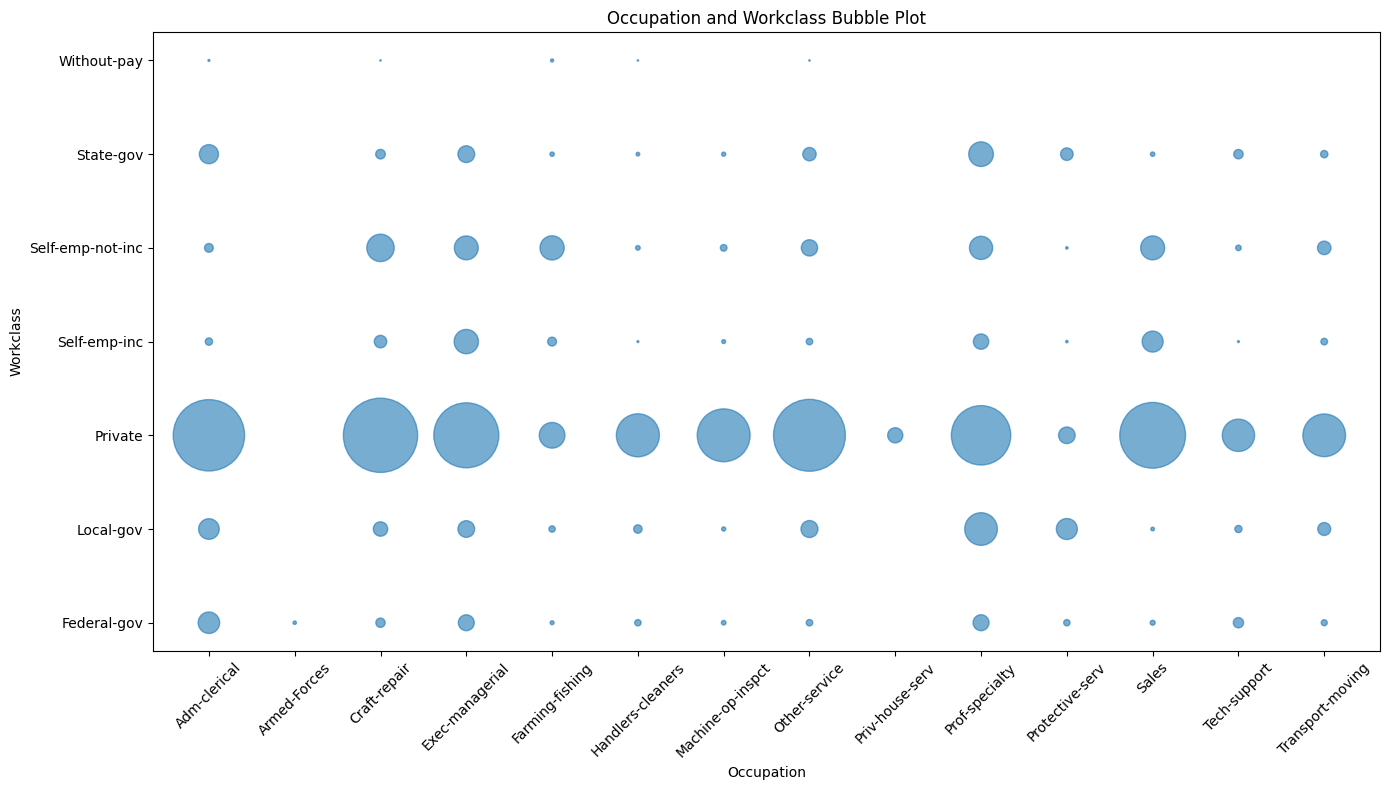

In [ ]:
# occupation과 workclass 간의 빈도 계산
occupation_workclass_counts = train_df.groupby(['occupation', 'workclass']).size().reset_index(name='counts')

plt.figure(figsize=(14, 8))
plt.scatter(x='occupation', y='workclass', s='counts', alpha=0.6, data=occupation_workclass_counts)
plt.title('Occupation and Workclass Bubble Plot')
plt.xlabel('Occupation')
plt.ylabel('Workclass')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


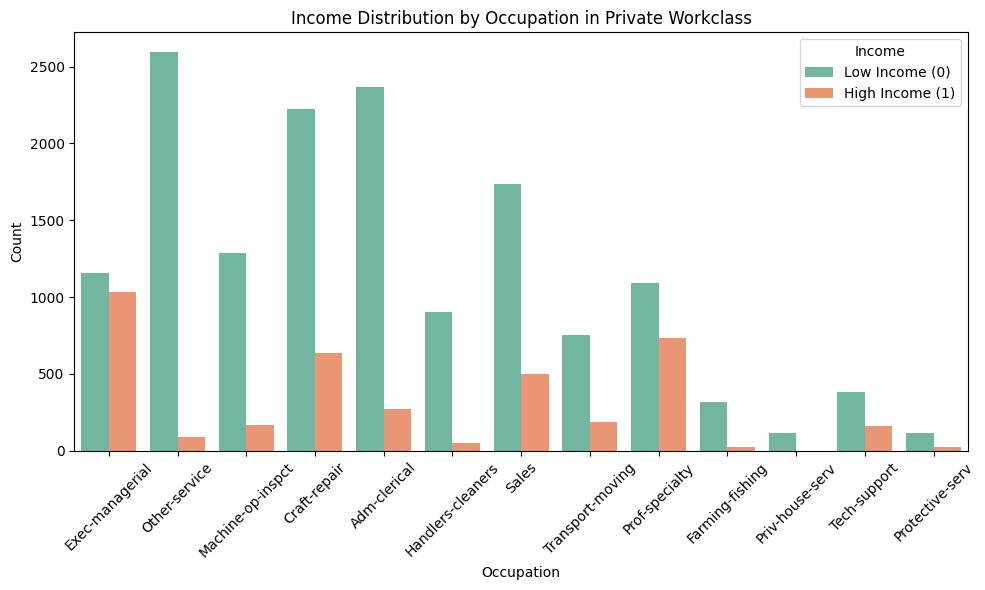

In [ ]:
private_df = train_df[train_df['workclass'] == 'Private']

plt.figure(figsize=(10, 6))
sns.countplot(x='occupation', hue='income', data=private_df, palette='Set2')
plt.title('Income Distribution by Occupation in Private Workclass')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right', labels=['Low Income (0)', 'High Income (1)'])
plt.tight_layout()
plt.show()


## 자본소득 관련

<ipython-input-23-23dce303ea09>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='capital.gain_log', data=train_df, palette='Set3')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to g

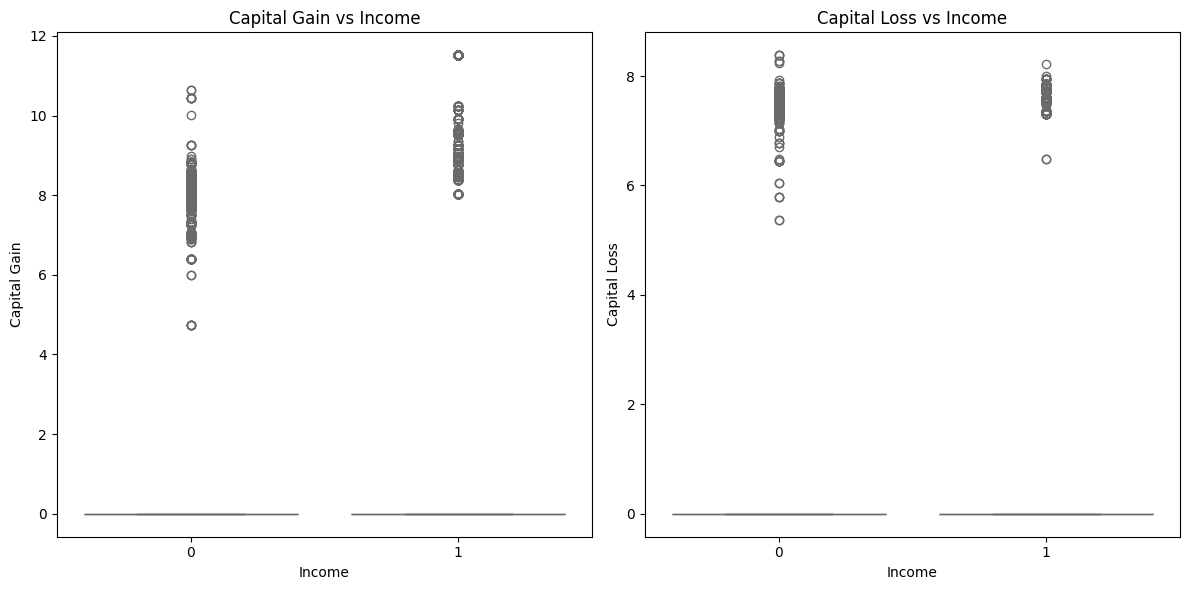

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='income', y='capital.gain_log', data=train_df, palette='Set3')
plt.title('Capital Gain vs Income')
plt.ylabel('Capital Gain')
plt.xlabel('Income')

plt.subplot(1, 2, 2)
sns.boxplot(x='income', y='capital.loss_log', data=train_df, palette='Set3')
plt.title('Capital Loss vs Income')
plt.ylabel('Capital Loss')
plt.xlabel('Income')

plt.tight_layout()
plt.show()

## 근무시간 관련

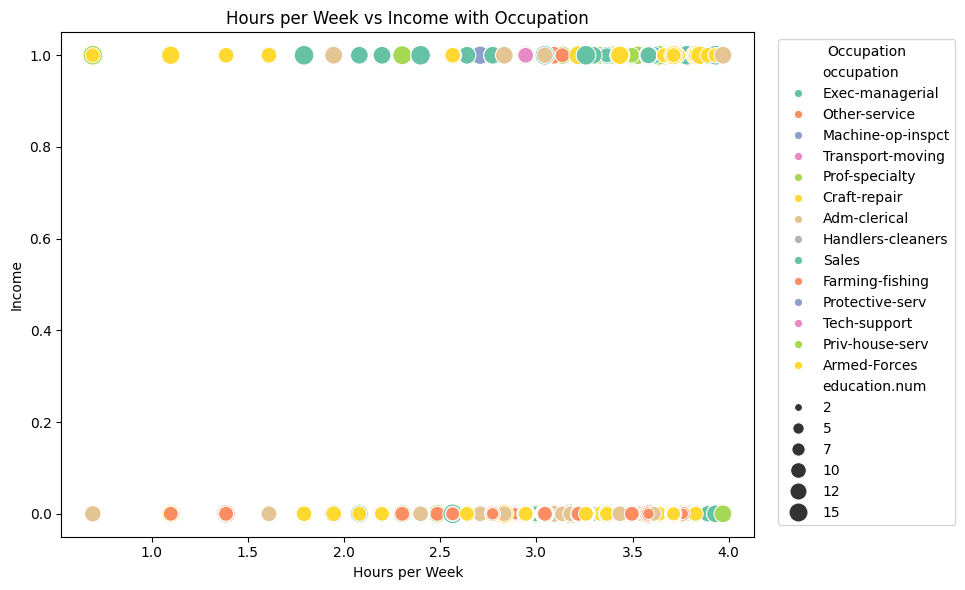

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
sns.scatterplot(x='hours.per.week_log', y='income', hue='occupation', size='education.num', data=train_df, palette='Set2', sizes=(20, 200))
plt.title('Hours per Week vs Income with Occupation')
plt.xlabel('Hours per Week')
plt.ylabel('Income')
plt.legend(title='Occupation', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()